In [1]:
import pandas as pd
import os


# Gather search terms and generate query for Scopus

In [2]:
systematic_search_terms= [
    'Belief* Network',
    'Belief* System',
    'Belief* Map',
    'Belief* Set',
    'Issue* Network',
    'Issue* System',
    'Issue* Map',
    'Issue* Set',
    'Opinion* Network',
    'Opinion* System', # keep an eye on this one
    'Opinion* Map',
    'Opinion* Set',
    # 'Value Network', catches valued networks too, physics heavy application
    # 'Values Network',
    'Value System',
    # 'Value* Map', business heavy application
    'Value Set',
    'Attitude* Network',
    'Attitude* System',
    'Attitude* Map',
    'Attitude* Set',
    # 'Cogni* Network', catches engineering and medical applications
    'Cogni* System',
    'Cogni* Map', # cognitive catches a lot of things, FUZZY exclude needed
    'Cogni* Set', 
    'Network of Belief',
    'Network of Issue',
    'Network of Opinion',
    # 'Network of Values', catching SBM stuff
    'Network of Attitudes',
    'Network of Cogni*', # FINISHED HERE 2023.11.20
    'System* of Beliefs',
    'System* of Issue',
    'System* of Opinion',
    'System* of Value',
    'System* of Attitude',
    # 'System* of Cogni*', catches neuroscience and dual process stuff
    'Map* of Belief',
    'Map* of Issue',
    'Map* of Opinion',
    # 'Map of Values',
    'Map* of Attitude',
    # 'Map of Cognitives', neuroscience heavy application
    # 'Set of Beliefs',
    # 'Set of Issues',
    # 'Set of Opinions',
    # 'Set of Values',
    # 'Set of Attitudes',
    # 'Set of Cognitives', lot of noise in all the "set" keywords
    'Relationship Between Belief',
    # 'Relationship Between of Issue' , ?
    'Relationship Between Opinion',
    'Relationship Between Value',
    'Relationship Between Attitude',
    # 'Relationship Between of Cognitives',
    "Mental Map",
]

def generate_query(search_terms):
    # Joining keywords with ' OR ' and enclosing each in quotation marks
    joined_search_terms = ' OR '.join(f'"{term}"' for term in search_terms)
    # Constructing the final query
    query = f'TITLE-ABS-KEY ({joined_search_terms})'
    return query

query = generate_query(systematic_search_terms)
print(query)


TITLE-ABS-KEY ("Belief* Network" OR "Belief* System" OR "Belief* Map" OR "Belief* Set" OR "Issue* Network" OR "Issue* System" OR "Issue* Map" OR "Issue* Set" OR "Opinion* Network" OR "Opinion* System" OR "Opinion* Map" OR "Opinion* Set" OR "Value System" OR "Value Set" OR "Attitude* Network" OR "Attitude* System" OR "Attitude* Map" OR "Attitude* Set" OR "Cogni* System" OR "Cogni* Map" OR "Cogni* Set" OR "Network of Belief" OR "Network of Issue" OR "Network of Opinion" OR "Network of Attitudes" OR "Network of Cogni*" OR "System* of Beliefs" OR "System* of Issue" OR "System* of Opinion" OR "System* of Value" OR "System* of Attitude" OR "Map* of Belief" OR "Map* of Issue" OR "Map* of Opinion" OR "Map* of Attitude" OR "Relationship Between Belief" OR "Relationship Between Opinion" OR "Relationship Between Value" OR "Relationship Between Attitude" OR "Mental Map")


# download by cagetory on all search terms


In [3]:
# Mapping of file numbers to categories
categories = {
    # 1: "Computer Science Pre 2017",
    1: "Computer Science",
    # 2: "Computer Science Post 2017",
    2: "Computer Science",
    # 3: "Engineering Pre 2017",
    3: "Engineering",
    # 4: "Engineering Post 2017",
    4: "Engineering",
    5: "Social Sciences",
    6: "Mathematics",
    7: "Psychology",
    8: "Arts and Humanities",
    9: "Medicine",
    10: "Neuroscience",
    11: "Business Management and Accounting",
    12: "Environmental Science",
    13: "Decision Sciences",
    14: "Physics and Astronomy",
    15: "Agricultural and Biological Sciences",
    16: "Materials Science",
    17: "Economics Econometrics Finance",
    18: "Biochemistry Genetics and Molecular Biology",
    19: "Earth and Planetary Sciences",
    20: "Energy",
    21: "Health Professions",
    22: "Nursing",
    23: "Multidisciplinary",
    24: "Chemical Engineering",
    25: "Chemistry",
    26: "Pharmacology Toxicology and Pharmaceutics",
    27: "Immunology and Microbiology",
    28: "Veterinary",
    29: "Dentistry",
    30: "Undefined",
}

# Directory containing the files
directory = "data/by category/raw/"  # Replace with the path to your files

# List to hold all dataframes
dataframes = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.startswith("scopus") and filename.endswith(".csv"):
        # Extract the number from the filename
        file_number = int(filename.split('(')[1].split(')')[0])+1
        # print(filename, file_number)
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add the category column
        df['Domain'] = categories.get(file_number, "Unknown")
        
        # Append the dataframe to the list
        dataframes.append(df)

# Now dataframes is a list of dataframes with the category column added
# concat all dataframes into one
papers = pd.concat(dataframes)

# filter on articles and book chapters
papers = papers[papers['Document Type'].isin(['Article', 'Book chapter'])]

print([papers.columns])


papers.head()


[Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'References', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID', 'Domain'],
      dtype='object')]


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Abstract,Author Keywords,Index Keywords,References,Document Type,Publication Stage,Open Access,Source,EID,Domain
0,Hernansanz A.; Parra J.; Sayols N.; Eixarch E....,"Hernansanz, Albert (23389102600); Parra, Johan...",23389102600; 55241569400; 57200699438; 8650046...,Robot assisted Fetoscopic Laser Coagulation: I...,2024,Artificial Intelligence in Medicine,147,NaN,102725,NaN,...,Fetoscopic Laser Coagulation (FLC) for Twin to...,Fetoscopic laser coagulation; Robotic minimall...,Exercise; Female; Fetoscopes; Humans; Laser Co...,"Blickstein I., Monochorionicity in perspective...",Article,Final,NaN,Scopus,2-s2.0-85178331130,Medicine
1,Verhoef R.E.J.; van Dijk A.; Thomaes S.; Verhu...,"Verhoef, Rogier E J (57203654220); van Dijk, A...",57203654220; 57193243200; 23013628300; 6504206...,Detecting social information processing profil...,2023,Development and psychopathology,35,4,NaN,1843,...,Children with aggressive behavior problems may...,aggression; children; latent profile analysis;...,Aggression; Child; Cognition; Executive Functi...,NaN,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85177103238,Medicine
2,Wang D.; Xie S.; Wu J.; Sun B.,"Wang, Dingyao (57744592600); Xie, Shitong (572...",57744592600; 57214320802; 57211842205; 5720888...,The trend in quality of life of Chinese popula...,2023,BMC Public Health,23,1,167,NaN,...,Background: Quality of life (QoL) is one of th...,China; EQ-5D; Population health surveys; Quali...,East Asian People; Female; Health Status; Heal...,The World Health Organization quality of life ...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146736945,Medicine
3,Elkenkamp S.; Ludwig K.; Greiner W.,"Elkenkamp, Svenja (57191894108); Ludwig, Krist...",57191894108; 57193359237; 23060152300,Influence of Self-Reported Health Impairments ...,2023,Value in Health,26,11,NaN,1636,...,Objectives: The German EQ-5D-5L value set is b...,EQ-5D-5L,Chronic Disease; Germany; Health Status; Human...,"Greiner W., 4. Der EQ-5D der EuroQol-Gruppe [H...",Article,Final,NaN,Scopus,2-s2.0-85174844795,Medicine
4,Weygand J.; Armstrong T.; Bryant J.M.; Andreoz...,"Weygand, Joseph (57189846670); Armstrong, Tess...",57189846670; 57193931890; 57212274130; 5616624...,"Accurate, repeatable, and geometrically precis...",2023,Physics and Imaging in Radiation Oncology,28,NaN,100505,NaN,...,Background and purpose: Diffusion weighted ima...,Apparent diffusion coefficient; Cellularity; D...,povidone; apparent diffusion coefficient; Arti...,"Raaymakers B.W., Lagendijk J.J.W., Overweg J.,...",Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85177795852,Medicine


In [4]:
# number of unique papers 
print("number of unique papers")
print("by title: ", len(papers['Title'].unique()))
print("by DOI: ", len(papers['DOI'].unique()))
print("by EID: ", len(papers['EID'].unique()))

number of unique papers
by title:  25993
by DOI:  24274
by EID:  26069


In [5]:
papers["Domain"].value_counts()

Domain
Computer Science                               9999
Engineering                                    7270
Psychology                                     5579
Medicine                                       5399
Arts and Humanities                            4071
Business Management and Accounting             3727
Mathematics                                    3692
Social Sciences                                3507
Neuroscience                                   2941
Agricultural and Biological Sciences           1618
Decision Sciences                              1390
Biochemistry Genetics and Molecular Biology    1366
Physics and Astronomy                          1200
Earth and Planetary Sciences                   1119
Materials Science                              1029
Energy                                          854
Health Professions                              778
Nursing                                         777
Multidisciplinary                               592
Chemi

In [21]:
# Group by a unique identifier (e.g., 'EID') and aggregate categories
unified_papers = papers.groupby(['Title', 'Authors', 'Year']).agg({
    # 'Authors': 'first', 
    # 'Author full names': 'first',
    'Author(s) ID': 'first',
    # 'Title': 'first',
    # 'Year': 'first',
    # 'Source title': 'first',
    # 'Volume': 'first',
    # 'Issue': 'first',
    # 'Art. No.': 'first',
    # 'Page start': 'first',
    # 'Page end': 'first',
    # 'Page count': 'first',
    # 'Cited by': 'first',
    # 'EID': 'first',
    # 'Link': 'first',
    'Abstract': 'first',
    'Author Keywords': 'first',
    'Index Keywords': 'first',
    # 'References': 'first',
    # 'Document Type': 'first',
    # 'Publication Stage': 'first',
    # 'Open Access': 'first',
    # 'Source': 'first',
    'Domain': lambda x: list(set(x))
}).reset_index()

unified_papers.to_pickle('data/by category/unified.pkl')


unified_papers

,Title,Authors,Year,Author(s) ID,Abstract,Author Keywords,Index Keywords,Domain
0,CORR Insights ...,Maltenfort M.,2017,57193449052,[No abstract available],None,Bayes Theorem; Humans; Osteosarcoma; Sarcoma; ...,[Medicine]
1,Cognitive deficits in...,Shukitt-Hale B.; Casadesus G.; Cantuti-Castelv...,2003,7003496560; 6602555792; 56455611200; 710284224...,Exposing rats to ...,None,Cognitive systems; Iron; Magnetosphere; Random...,"[Earth and Planetary Sciences, Physics and Ast..."
2,Estimating Regional G...,Shen H.; Li T.; Yuan Q.; Zhang L.,2018,8359721100; 56813980500; 36635300800; 8359720900,Almost all remote...,deep learning; PM2.5; satellite remote sensing...,China; Hubei; aerosol composition; atmospheric...,[Earth and Planetary Sciences]
3,Exploration of the im...,Devi D.D.A.D.; Rani J.F.M.; Vijayalakshmi P.; ...,2019,57208599994; 57208872780; 57210637529; 5721060...,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting]
4,On components of vect...,Anbar N.; Kaşıkcı C.; Topuzoğlu A.,2019,35147710400; 57188925203; 8971576800,We consider vecto...,Curves over finite fields; Local permutation p...,Finite element method; Absolutely irreducible;...,[Mathematics]
...,...,...,...,...,...,...,...,...
25995,“Will There Be a Willingness to Actually Engag...,Osazuwa S.; Moodley R.,2023,57193425519; 11439340300,The added focus on health equity and multicult...,African indigenous healing traditions and beli...,adult; African; African American; Article; att...,"[Medicine, Psychology]"
25996,"“Wo Sind EUre Werte?"": Remarks on the Practica...",Schink P.,2023,56528414200,"Against the backdrop of flight, migration and ...",None,None,"[Engineering, Arts and Humanities]"
25997,“Would You Allow Your Wife to Dress in a Minis...,Marín-Morales A.; Bueso-Izquierdo N.; Hidalgo-...,2022,57196236986; 56755401000; 36018521100; 5715605...,Moral convictions consist of assessments based...,batterers; default mode network; dilemmas; fMR...,Criminals; Default Mode Network; Female; Human...,[Psychology]
25998,"“…I have my dad, sister, brother, and mom’s pa...",Dumaru P.; Shrestha A.; Paudel R.; Haverkamp C...,2023,58070694200; 57205659425; 58070694300; 5720174...,Purpose: The purpose of this study is to under...,Mental models; Security tools; User study,Privacy-preserving techniques; Data access; De...,"[Business Management and Accounting, Computer ..."


In [22]:
unified_papers["Domain"].apply(lambda x: len(x)).value_counts()


Domain
1    16005
2     6998
3     2278
4      510
5      184
6       19
7        5
8        1
Name: count, dtype: int64

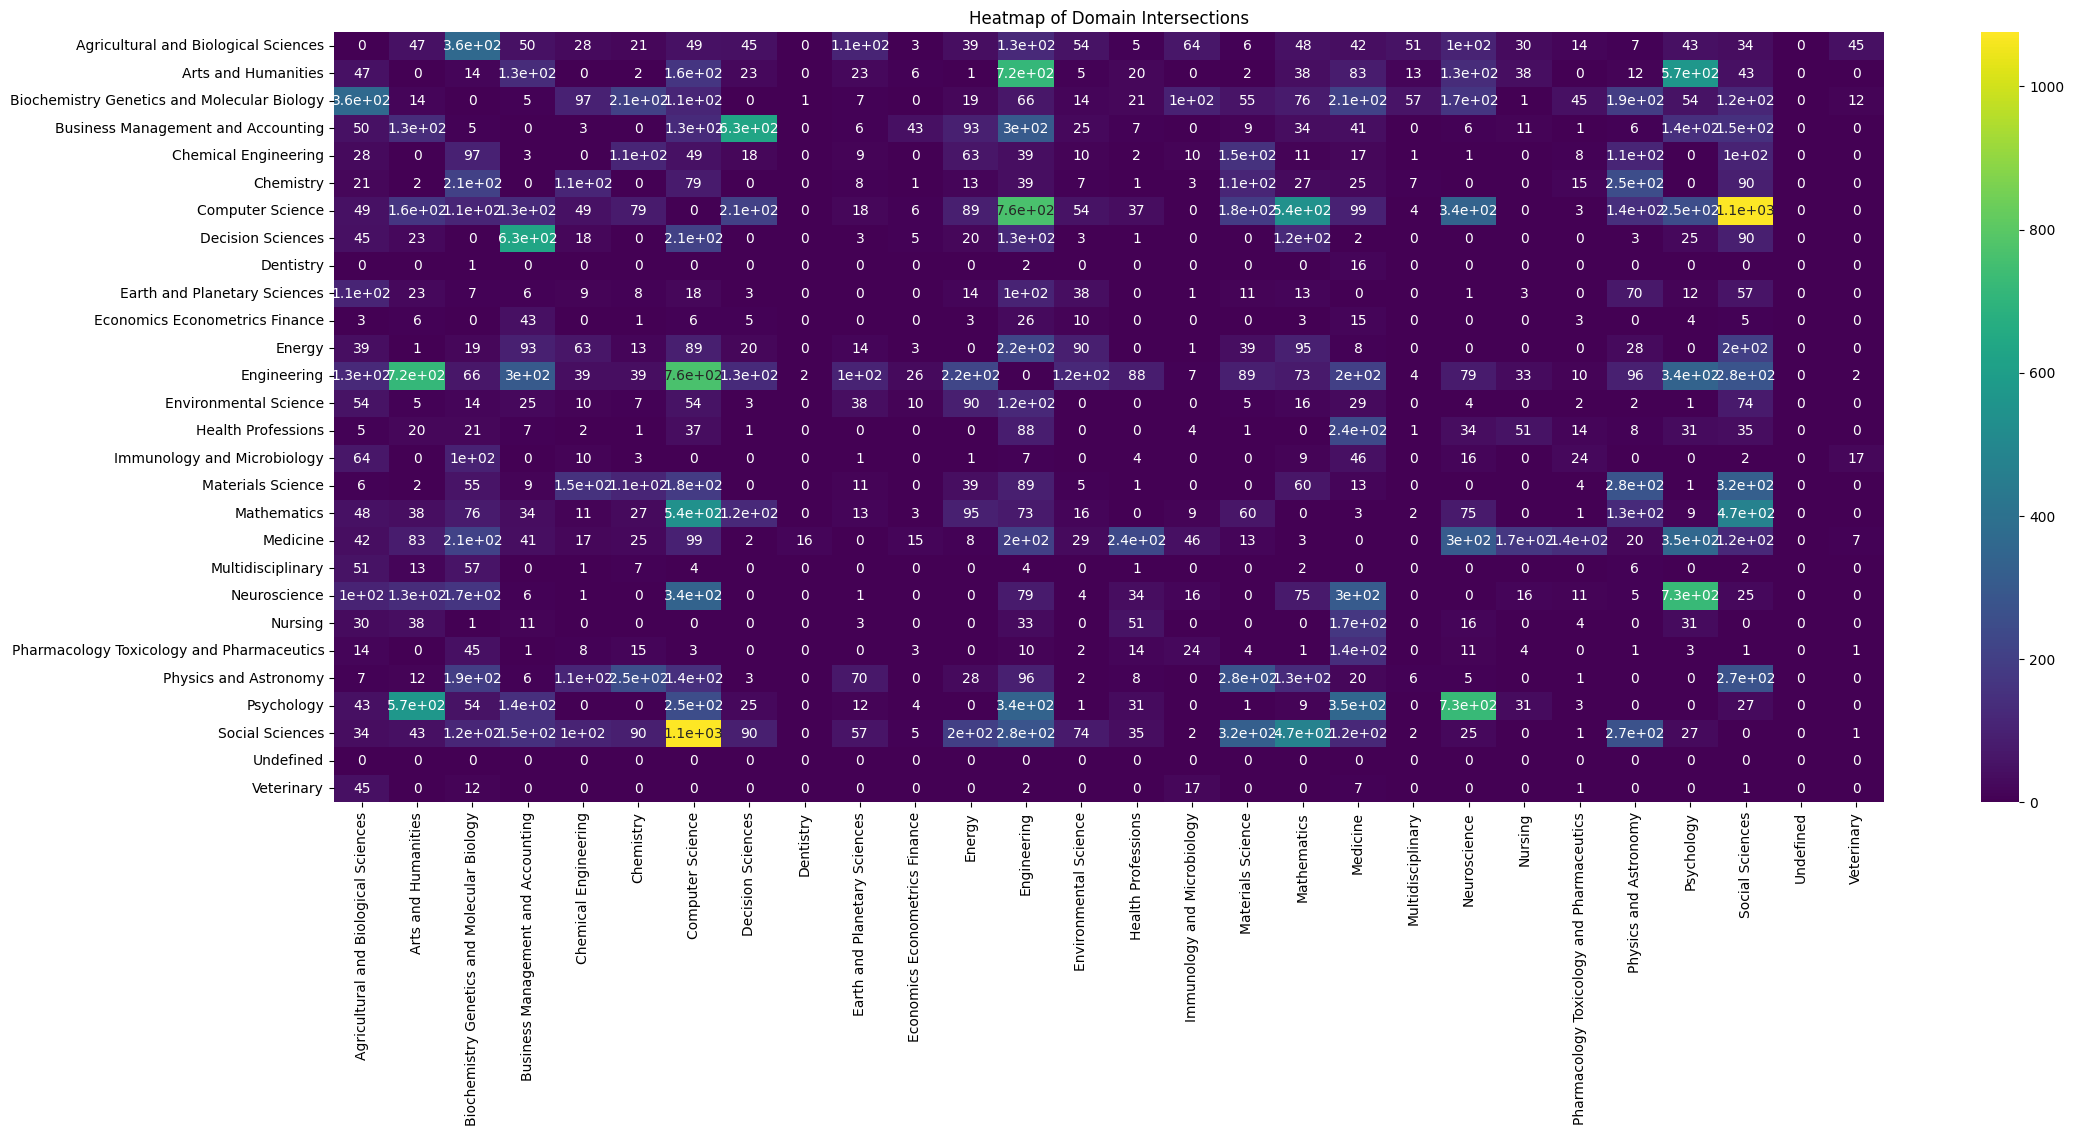

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataframe structure
df = unified_papers

# Step 1: Extract Domains
all_domains = set()
for domains in df['Domain']:
    all_domains.update(domains)
all_domains = sorted(all_domains)

# Step 2: Build Intersection Matrix
intersection_matrix = pd.DataFrame(0, index=all_domains, columns=all_domains)

for domains in df['Domain']:
    for i in range(len(domains)):
        for j in range(i+1, len(domains)):
            intersection_matrix.at[domains[i], domains[j]] += 1
            intersection_matrix.at[domains[j], domains[i]] += 1

# Step 3: Create Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(intersection_matrix, annot=True, cmap='viridis')
plt.title('Heatmap of Domain Intersections')
plt.show()


# Searh term matching


In [24]:
unified_papers = pd.read_pickle('data/by category/unified.pkl')
unified_papers.head()

,Title,Authors,Year,Author(s) ID,Abstract,Author Keywords,Index Keywords,Domain
0,CORR Insights ...,Maltenfort M.,2017,57193449052,[No abstract available],None,Bayes Theorem; Humans; Osteosarcoma; Sarcoma; ...,[Medicine]
1,Cognitive deficits in...,Shukitt-Hale B.; Casadesus G.; Cantuti-Castelv...,2003,7003496560; 6602555792; 56455611200; 710284224...,Exposing rats to ...,None,Cognitive systems; Iron; Magnetosphere; Random...,"[Earth and Planetary Sciences, Physics and Ast..."
2,Estimating Regional G...,Shen H.; Li T.; Yuan Q.; Zhang L.,2018,8359721100; 56813980500; 36635300800; 8359720900,Almost all remote...,deep learning; PM2.5; satellite remote sensing...,China; Hubei; aerosol composition; atmospheric...,[Earth and Planetary Sciences]
3,Exploration of the im...,Devi D.D.A.D.; Rani J.F.M.; Vijayalakshmi P.; ...,2019,57208599994; 57208872780; 57210637529; 5721060...,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting]
4,On components of vect...,Anbar N.; Kaşıkcı C.; Topuzoğlu A.,2019,35147710400; 57188925203; 8971576800,We consider vecto...,Curves over finite fields; Local permutation p...,Finite element method; Absolutely irreducible;...,[Mathematics]


In [25]:
import re
def scopus_query_to_regex(query):
    words = query.split()
    regex_parts = [word.replace('*', '\\S*') for word in words]
    regex_pattern = '\\s+'.join(regex_parts)
    return re.compile(regex_pattern, re.IGNORECASE)


In [26]:
# Compile regex patterns with their corresponding keywords
compiled_patterns = [(keyword, scopus_query_to_regex(keyword)) for keyword in systematic_search_terms]

def find_matching_terms(text):
    # Find all keywords that match the text
    matched_search_terms = [term for term, pattern in compiled_patterns if pattern.search(text)]
    return matched_search_terms

# Apply the function across the DataFrame
unified_papers['Matched Search Terms'] = unified_papers.apply(
    lambda row: find_matching_terms(row['Title'] + ' ' + row['Abstract'] + ' ' + str(row['Author Keywords']) + ' ' + str(row['Index Keywords'])),
    axis=1
)


In [27]:
unified_papers["Matched Search Terms"].value_counts()

Matched Search Terms
[Cogni* System]                                      6775
[Belief* Network]                                    3304
[Value System]                                       2989
[Belief* System]                                     2975
[Cogni* Map]                                         2237
                                                     ... 
[Value System, Cogni* Map]                              1
[Attitude* Network, Network of Attitudes]               1
[Attitude* System, Relationship Between Attitude]       1
[Belief* Network, Mental Map]                           1
[Belief* System, Network of Belief]                     1
Name: count, Length: 99, dtype: int64

In [28]:
unified_papers['Matched Search Terms'].apply(lambda x: len(x)).value_counts()

Matched Search Terms
1    23586
0     1486
2      917
3       10
4        1
Name: count, dtype: int64

In [29]:
filtered_papers = unified_papers[unified_papers['Matched Search Terms'].apply(lambda x: len(x) != 0)]

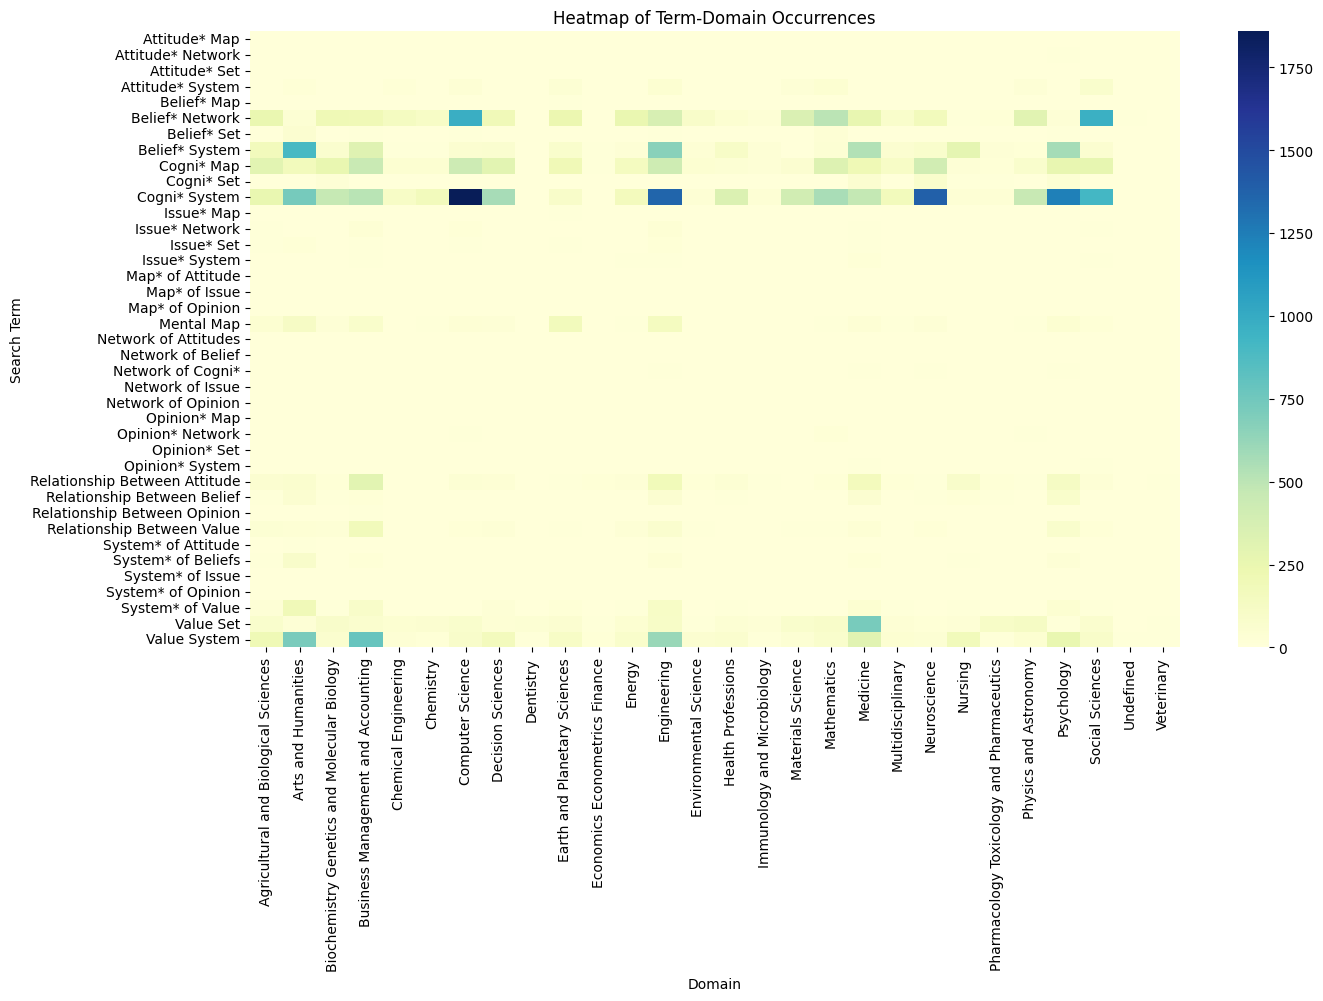

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming unified_papers is your DataFrame

# Step 1: Flatten the DataFrame
rows = []
for _, row in unified_papers.iterrows():
    for term in row['Matched Search Terms']:
        for domain in row['Domain']:
            rows.append({'Search Term': term, 'Domain': domain})

flattened_df = pd.DataFrame(rows)

# Step 2: Create a Pivot Table
pivot_table = pd.pivot_table(flattened_df, index='Search Term', columns='Domain', aggfunc=len, fill_value=0)

# Step 3: Generate the Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, 
            # annot=True,
            cmap='YlGnBu')
plt.title('Heatmap of Term-Domain Occurrences')
plt.ylabel('Search Term')
plt.xlabel('Domain')
plt.show()


In [31]:
pair_df = flattened_df.groupby(['Domain','Search Term']).size().reset_index().rename(columns={0:'document_count'}).sort_values('document_count', ascending=False)
pair_df = pair_df[pair_df['document_count'] > 50]
pair_df["Include"] = 0

# split dataframe into two and save parts into two csv files
pair_df.iloc[:len(pair_df)//2].to_csv('data/domain_search_term_pairs_1.csv', index=False) # for Arturo
pair_df.iloc[len(pair_df)//2:].to_csv('data/domain_search_term_pairs_2.csv', index=False) # for Laura

pair_df

,Domain,Search Term,document_count,Include
158,Computer Science,Cogni* System,1858,0
477,Neuroscience,Cogni* System,1380,0
286,Engineering,Cogni* System,1361,0
566,Psychology,Cogni* System,1238,0
153,Computer Science,Belief* Network,976,0
...,...,...,...,...
422,Medicine,Cogni* Set,52,0
33,Arts and Humanities,Belief* Set,52,0
155,Computer Science,Belief* System,52,0
299,Engineering,Relationship Between Belief,52,0


In [32]:
arturo_review = pd.read_excel('data/manual_audit_arturo_1.xlsx')
laura_review = pd.read_excel('data/domain_search_term_pairs_2.xlsx')

In [33]:
included_terms = arturo_review.loc[arturo_review['Include'] == 1, ['Domain', 'Search Term']].apply(tuple, axis=1).tolist() + laura_review.loc[laura_review['Include'] == 1, ['Domain', 'Search Term']].apply(tuple, axis=1).tolist()


In [34]:
unified_papers['Criteria'] = unified_papers.apply(lambda row: [(domain, search_term) for domain in row['Domain'] for search_term in row['Matched Search Terms']], axis=1)

In [37]:
filtered_unified_papers = unified_papers[unified_papers['Criteria'].apply(lambda criteria: any(criterion in included_terms for criterion in criteria))].reset_index(drop=True)
filtered_unified_papers

,Title,Authors,Year,Author(s) ID,Abstract,Author Keywords,Index Keywords,Domain,Matched Search Terms,Criteria
0,Estimating Regional G...,Shen H.; Li T.; Yuan Q.; Zhang L.,2018,8359721100; 56813980500; 36635300800; 8359720900,Almost all remote...,deep learning; PM2.5; satellite remote sensing...,China; Hubei; aerosol composition; atmospheric...,[Earth and Planetary Sciences],[Belief* Network],"[(Earth and Planetary Sciences, Belief* Network)]"
1,Exploration of the im...,Devi D.D.A.D.; Rani J.F.M.; Vijayalakshmi P.; ...,2019,57208599994; 57208872780; 57210637529; 5721060...,"Digitalization, the fashion of this era has tu...",Blended learning; Combined disjoint block; Fuz...,None,[Business Management and Accounting],[Cogni* Map],"[(Business Management and Accounting, Cogni* M..."
2,A Botanical Beehive of poetry and belief in ...,Mote M.,2023,56548663400,Botanical Beehive describes and interprets an ...,Botany; nature printing; pietism; poetry,None,"[Arts and Humanities, Environmental Science]",[Relationship Between Belief],"[(Arts and Humanities, Relationship Between Be..."
3,"Colonialingualism: colonial legacies, imperi...",Meighan P.J.,2023,57210725703,Translanguaging and plurilingual approaches in...,None,None,[Engineering],[Belief* System],"[(Engineering, Belief* System)]"
4,The Man Died: Wole Soyinka’s imprisonment an...,Osagie I.,2022,26035309600,Nigerian playwright Femi Euba utilizes the Yor...,Esu; Nigerian civil war; Obafemi Awolowo; ritu...,None,"[Engineering, Arts and Humanities]",[Belief* System],"[(Engineering, Belief* System), (Arts and Huma..."
...,...,...,...,...,...,...,...,...,...,...
7854,“This is what real spirituality is all about”:...,Russo-Netzer P.,2019,55173832300,Processes of personal and individual spiritual...,authenticity; boundary work; qualitative metho...,None,"[Arts and Humanities, Psychology]",[System* of Beliefs],"[(Arts and Humanities, System* of Beliefs), (P..."
7855,“To Help You Find Your Way Home”: Michael Kusu...,Johnstone T.,2020,57204340640,"Inuit children’s book author, Michael Arvaarlu...",None,None,[Arts and Humanities],[Belief* System],"[(Arts and Humanities, Belief* System)]"
7856,“Trees Are Our Relatives”: Local Perceptions o...,Chanza N.; Musakwa W.,2021,57188660492; 55599058500,The link between nature and society is vital f...,Climate change; Forests; Indigenous knowledge;...,Mashonaland Central; Mbire; Zimbabwe; abatemen...,"[Engineering, Social Sciences, Computer Scienc...",[Belief* System],"[(Engineering, Belief* System), (Social Scienc..."
7857,“Uncanny creatures of the dark.” Exploring the...,Benavides P.; Ibarra J.T.,2021,55674375700; 34768532100,Belief systems of human societies are deeply r...,Chile; Mapuche; Owls; The uncanny; Traditional...,None,"[Engineering, Arts and Humanities]",[Belief* System],"[(Engineering, Belief* System), (Arts and Huma..."


# Co-authorship network

In [39]:
from tqdm import tqdm

papers_df = filtered_unified_papers

papers_df['Author(s) ID List'] = papers_df['Author(s) ID'].apply(lambda x: x.split('; '))

# Initialize an empty list to store edges
edges = []

# Generate edges
for i in tqdm(range(len(papers_df))):
    for j in range(i + 1, len(papers_df)):
        # Check for shared authors
        if set(papers_df.at[i, 'Author(s) ID List']).intersection(papers_df.at[j, 'Author(s) ID List']):
            edges.append((papers_df.at[i, 'Title'], papers_df.at[j, 'Title']))

# Create an edge DataFrame
edges_df = pd.DataFrame(edges, columns=['Source', 'Target'])

papers_df.drop(columns=['Author(s) ID List'], inplace=True) # Clean up the original dataframe

papers_df, edges_df

100%|██████████| 7859/7859 [01:58<00:00, 66.47it/s] 


(                                                  Title  \
 0                              Estimating Regional G...   
 1                              Exploration of the im...   
 2       A Botanical Beehive of poetry and belief in ...   
 3       Colonialingualism: colonial legacies, imperi...   
 4       The Man Died: Wole Soyinka’s imprisonment an...   
 ...                                                 ...   
 7854  “This is what real spirituality is all about”:...   
 7855  “To Help You Find Your Way Home”: Michael Kusu...   
 7856  “Trees Are Our Relatives”: Local Perceptions o...   
 7857  “Uncanny creatures of the dark.” Exploring the...   
 7858  “White Jihad” and “White Sharia”: Jihadism as ...   
 
                                                 Authors  Year  \
 0                     Shen H.; Li T.; Yuan Q.; Zhang L.  2018   
 1     Devi D.D.A.D.; Rani J.F.M.; Vijayalakshmi P.; ...  2019   
 2                                               Mote M.  2023   
 3            

In [40]:
papers_df.to_csv('data/network/node_list.csv', index=False)
edges_df.to_csv('data/network/edge_list.csv', index=False)